In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor





In [19]:
df = pd.read_csv(r"C:\Users\Admin\Documents\DATA.COM\house_train.csv")
df2=pd.read_csv(r"C:\Users\Admin\Documents\DATA.COM\house_test.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


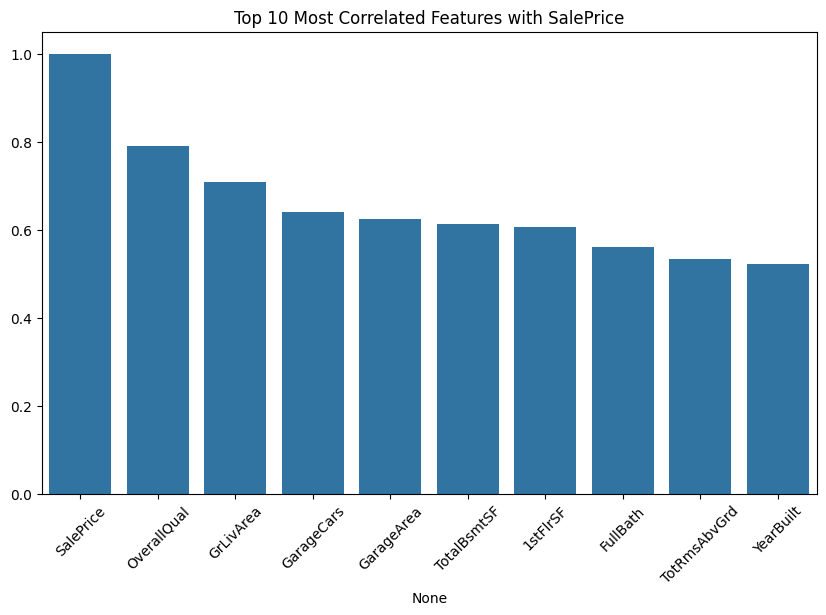

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [20]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()["SalePrice"].sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=correlation.index[:10], y=correlation.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Correlated Features with SalePrice")
plt.show()

print(correlation.head(10))
top_features = correlation.index[1:11].tolist()


In [21]:
df1 = df
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
fill_strategies = {
    'OverallQual': df['OverallQual'].mode()[0],    
    'GrLivArea': df['GrLivArea'].median(),        
    'GarageCars': df['GarageCars'].mode()[0],   
    'GarageArea': df['GarageArea'].median(),    
    'TotalBsmtSF': df['TotalBsmtSF'].median(),   
    '1stFlrSF': df['1stFlrSF'].median(),        
    'FullBath': df['FullBath'].mode()[0],       
    'TotRmsAbvGrd': df['TotRmsAbvGrd'].mode()[0],
    'YearBuilt': df['YearBuilt'].median(),       
    'YearRemodAdd': df['YearRemodAdd'].median(),
    '2ndFlrSF' : df['2ndFlrSF'].median() 
}

for col, fill_value in fill_strategies.items():
    df1[col].fillna(fill_value, inplace=True)




fill_strategies = {
    'OverallQual': df2['OverallQual'].mode()[0],    
    'GrLivArea': df2['GrLivArea'].median(),        
    'GarageCars': df2['GarageCars'].mode()[0],   
    'GarageArea': df2['GarageArea'].median(),    
    'TotalBsmtSF': df2['TotalBsmtSF'].median(),   
    '1stFlrSF': df2['1stFlrSF'].median(),        
    'FullBath': df2['FullBath'].mode()[0],       
    'TotRmsAbvGrd': df2['TotRmsAbvGrd'].mode()[0],
    'YearBuilt': df2['YearBuilt'].median(),       
    'YearRemodAdd': df2['YearRemodAdd'].median() , 
    '2ndFlrSF' : df2['2ndFlrSF'].median() 
}

for col, fill_value in fill_strategies.items():
    df2[col].fillna(fill_value, inplace=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_2308\1425554186.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(fill_value, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2308\1425554186.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [23]:
#BEST Feature engineering

df1['ndFlrSF']=(df1['1stFlrSF']+df1['2ndFlrSF'])/2
df2['ndFlrSF']=(df2['1stFlrSF']+df2['2ndFlrSF'])/2
df1['Quality_Size'] = df1['OverallQual'] * df1['GrLivArea']
df2['Quality_Size'] = df2['OverallQual'] * df2['GrLivArea']
df1['Total_Bathrooms'] = df1['FullBath'] + df1['GarageCars']
df2['Total_Bathrooms'] = df2['FullBath'] + df2['GarageCars']
df1['TotalSF'] = df1['TotalBsmtSF'] + df1['1stFlrSF'] + df1['2ndFlrSF']
df2['TotalSF'] = df2['TotalBsmtSF'] + df2['1stFlrSF'] + df2['2ndFlrSF']
neighborhood_mean = df1.groupby('Neighborhood')['SalePrice'].mean().to_dict()
df1['Neighborhood_Encoded'] = df1['Neighborhood'].map(neighborhood_mean)
neighborhood_mean = df1.groupby('Neighborhood')['SalePrice'].mean().to_dict()
df2['Neighborhood_Encoded'] = df2['Neighborhood'].map(neighborhood_mean)


In [24]:
# XGB MODEL 
features = df1.drop('SalePrice', axis=1).columns  
X = pd.get_dummies(df1[features], drop_first=True, dtype=int)  
y = df1['SalePrice'].astype(float)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Xt = pd.get_dummies(df2[features], drop_first=True, dtype=int)

Xt = Xt.reindex(columns=X_train.columns, fill_value=0)

param_grid = {
    'n_estimators': [100],
    'max_depth': [8],
    'learning_rate': [0.06],
    'subsample': [0.7],
    'colsample_bytree': [0.7, 0.8]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=0),
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

# Evaluate 
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_predxb = best_model.predict(Xt)

#  RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.7}
RMSE on testing set: 23583.66


In [25]:

#GridSearchCV MODEL
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [250],
    'learning_rate': [0.03],
    'max_depth': [3, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

grid_search = GridSearchCV(estimator=LGBMRegressor(random_state=0),
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Use MSE for regression
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_test_lgb = best_model.predict(Xt)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4200
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 162
[LightGBM] [Info] Start training from score 179980.860445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [26]:
if 'Id' not in df2.columns:
    raise ValueError("Column 'Id' not found in the testing data (df2).")


submission = pd.DataFrame({
    'Id': df2['Id'],  
    'SalePrice': y_predxb
})

submission.to_csv(r"C:\Users\Admin\Documents\DATA.COM\houss19_submission.csv", index=False)

print("Submission DataFrame:")
print(submission)

Submission DataFrame:
        Id      SalePrice
0     1461  124884.015625
1     1462  160364.031250
2     1463  183414.671875
3     1464  188953.687500
4     1465  182185.000000
...    ...            ...
1454  2915   91404.187500
1455  2916   90683.664062
1456  2917  158431.046875
1457  2918  127327.265625
1458  2919  216524.593750

[1459 rows x 2 columns]


XGB MODEL  IS THE BEST 